In [27]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
def tablepd(table):
    rows = table.findAll("tr")
    columns=list(range(len(rows[0])))
    df = pd.DataFrame(columns=columns)
    for i in range(len(rows)):
        tds = rows[i].find_all('td')
        if len(tds) == len(columns):
            values = [ td.text.replace('\n', '').replace('\xa0', ' ') for td in tds ]
            df = df.append(pd.Series(values, index=columns), ignore_index= True)
    
    return df

In [9]:
url='https://npb.jp/bis/2023/stats/bat_p.html'
html = urlopen(url)
soup = BeautifulSoup(html, "html.parser")
table = soup.findAll("table")[0]

In [6]:
df=tablepd(table)

In [19]:
import pandas as pd

url = 'https://npb.jp/bis/2023/stats/bat_p.html'
dfs = pd.read_html(url)

In [20]:
columns = ['no','player','team','avg','game','pa','ab','r','h','2b','3b','hr','tb','rbi','sb','cs','sac','sf','bb','ibb','db','so','gidp','slg','obp']

df = dfs[0]
df.drop(df.index[[0, 1]],inplace=True)
df.columns=columns

In [33]:
columns = ['no','player','team','avg','game','pa','ab','r','h','2b','3b','hr','tb','rbi','sb','cs','sac','sf','bb','ibb','db','so','gidp','slg','obp']
batstats = pd.DataFrame(columns=columns)

for y in range(10):
    for l in ['c','p']:
        year = 2014+y
        url='https://npb.jp/bis/{}/stats/bat_{}.html'.format(year,l)
        dfs = pd.read_html(url)
        df = dfs[0]
        df.drop(df.index[[0, 1]],inplace=True)
        df.columns=columns
        batstats = pd.concat([batstats, df], axis=0)

In [34]:
batstats = batstats.astype({'hr': 'int', 'rbi': 'int'}) 

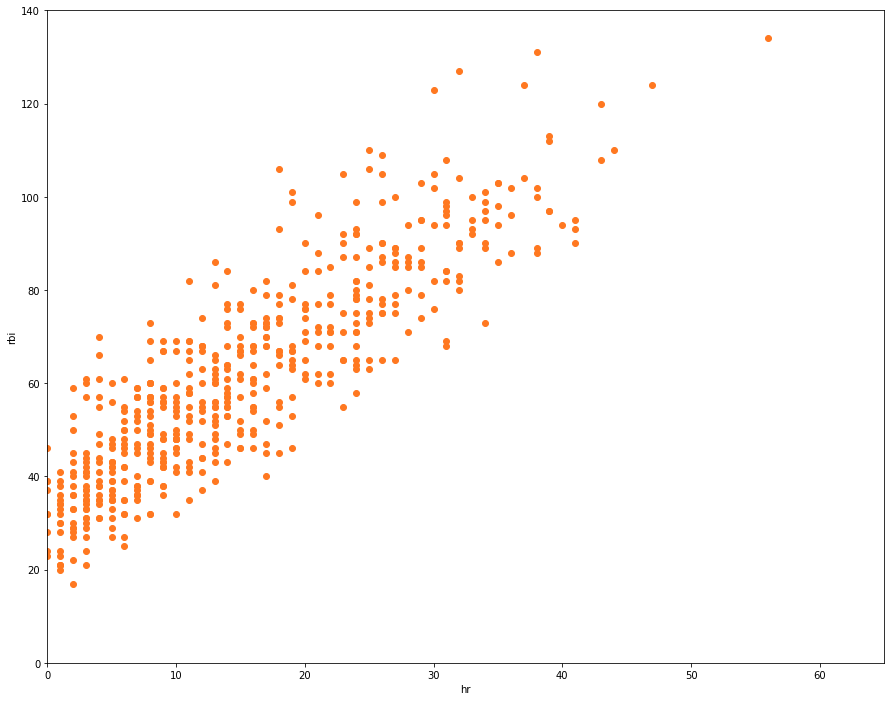

In [37]:
# プロット
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, xlabel='hr', ylabel='rbi', xlim=(0,65), ylim=(0,140))

ax.scatter(batstats['hr'], batstats['rbi'], c='#FF7820')

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# くちばしの長さと体重のデータを抽出
hr = batstats['hr']
rbi = batstats['rbi']

# 線形回帰モデルの訓練
reg = LinearRegression()
reg.fit(hr.values.reshape(-1, 1), rbi)

LinearRegression()

In [39]:
# 線形回帰の結果（パラメータ）を出力
slope = reg.coef_[0]
intercept = reg.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  1.8587877579533112
Intercept:  33.49804007211504


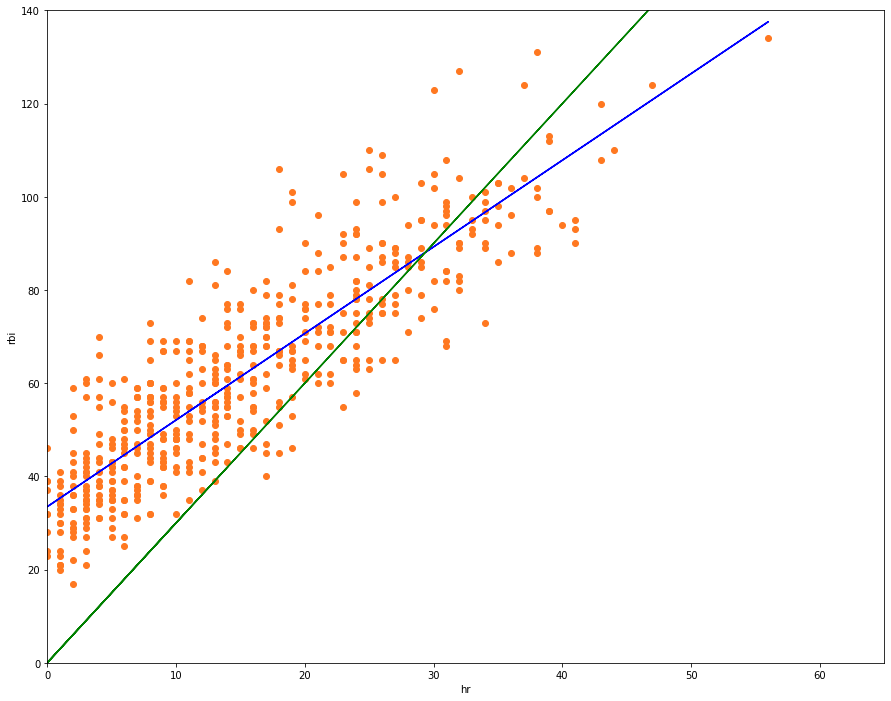

In [43]:
# プロット
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, xlabel='hr', ylabel='rbi', xlim=(0,65), ylim=(0,140))

ax.scatter(batstats['hr'], batstats['rbi'], c='#FF7820')
ax.plot(hr, reg.predict(hr.values.reshape(-1, 1)), color='b', label='Linear Regression')
ax.plot(hr, hr*3, color='g', label='3x rbi')


In [45]:
batstats['hr_rbi_ratio'] =  batstats['rbi']/batstats['hr']